In [18]:
import typing 
import pandas 
import seaborn
import cltrier_lib


SEED: int = 1

In [19]:
post_ids: pandas.DataFrame = (
    pandas.read_csv("../data/interim/twitter.german.posts.csv", index_col=0)
    [["id"]]
)
post_ids

,id
130351,1640263711905423360
130373,1629096801503420416
130279,1632391902698827777
130454,1628328481456025600
130467,1618971719229915138
...,...
15440,1620120210748604416
15386,1618991725128880131
15426,1630893887404351492
15334,1622533832464285696


In [45]:
replies = (
    pandas.read_csv("../data/raw/twitter.german/GermanyReplies2023.csv", index_col=0)
    .merge(post_ids, left_on="conversation_id", right_on="id")
    .drop(columns=["username", "id_y"])
    .rename(columns={"id_x": "id"})
    [["id", "author_id", "conversation_id", "text", "created_at"]]
)
replies

,id,author_id,conversation_id,text,created_at
0,1618423065322614785,1346043407286861824,1618175028264341509,@n_roettgen VollNorbert,2023-01-26T01:38:22.000Z
1,1618422176503468033,859656892515323904,1618175028264341509,@n_roettgen Röttgen träumt,2023-01-26T01:34:50.000Z
2,1615837811294507008,1577540347437129728,1615836681713897472,@Einschlag22's account is temporarily unavaila...,2023-01-18T22:25:29.000Z
3,1618919975342710784,1480944932114386946,1618175028264341509,@n_roettgen 🤡,2023-01-27T10:32:54.000Z
4,1618931943554555905,1504903461158232066,1618175028264341509,@n_roettgen Dass die Ukraine nun endlich Leopa...,2023-01-27T11:20:28.000Z
...,...,...,...,...,...
170822,1609956263428870147,1295365631748055044,1609821802993442816,"@MalteKaufmann Schön wärs, wenn man erfahren k...",2023-01-02T16:54:19.000Z
170823,1614621374747656200,1481944130125246467,1614519432356958208,@MalteKaufmann Was lassen wir uns noch von der...,2023-01-15T13:51:48.000Z
170824,1609958744473112583,153000722,1609821802993442816,@MalteKaufmann Ich habe viele Videos vom Silve...,2023-01-02T17:04:10.000Z
170825,1620795823578812416,882160247594418177,1620339792121839618,@HerbrandMarkus @jamila_anna Lustig wie Du die...,2023-02-01T14:46:51.000Z


In [46]:
# calculate the distribution of user activity (number of posts)
user_activity_dist: pandas.Series = replies["author_id"].value_counts().describe(percentiles=[.25, .5, .75, .8, .85, .9, .95, .96, .97, .98, .99, .995])
user_activity_dist

count    53844.000000
mean         3.172628
std          4.909255
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
80%          4.000000
85%          5.000000
90%          7.000000
95%         11.000000
96%         12.000000
97%         15.000000
98%         18.000000
99%         23.570000
99.5%       30.000000
max        180.000000
Name: count, dtype: float64

In [47]:
sampled_replies: pandas.DataFrame = (
    replies
    [   
        # select only the 40% most active users
        replies["author_id"].isin(
            list((replies["author_id"].value_counts() > user_activity_dist.loc["99.5%"]).pipe(lambda _s : _s[_s]).index)
        )
    ]
    .groupby("author_id")
    # sample by number of least active 40%' user posts
    .sample(n=int(user_activity_dist.loc["99.5%"]), random_state=SEED)
)

len(sampled_replies), len(sampled_replies["author_id"].unique())

(7830, 261)

In [48]:
sampled_replies

,id,author_id,conversation_id,text,created_at
79088,1637168335048646658,15891726,1637145132397916161,@f_schaeffler Dann bauen wir doch da ein KKW hin.,2023-03-18T19:05:22.000Z
72594,1631783632519016449,15891726,1631341994235633669,@christianduerr Sie haben wirklich keine Ahnung.,2023-03-03T22:28:29.000Z
122391,1643225542278144000,15891726,1643132657885216769,@katjadler Ihre Ideologie schlägt gar nichts. ...,2023-04-04T12:14:33.000Z
163106,1620501475343441926,15891726,1620347892048482305,@christophploss Zum Glück sind diesmal keine u...,2023-01-31T19:17:13.000Z
98454,1635528600899256321,15891726,1635169324343373825,@JuliaKloeckner Das Land wird durch Gestalten ...,2023-03-14T06:29:39.000Z
...,...,...,...,...,...
94545,1646928555778142216,1633533791900663809,1646798594119286786,"@MarcusFaber Ukrainische Zeitenwende, während ...",2023-04-14T17:29:00.000Z
94973,1650046072499195904,1633533791900663809,1650041581120942084,@MarcusFaber Wir? Was hast Du denn erreicht? C...,2023-04-23T07:56:54.000Z
102890,1633738863062441984,1633533791900663809,1633382997389983744,@nyke_slawik Nein. Frauen sind Frauen und Männ...,2023-03-09T07:57:53.000Z
23721,1634519169537286150,1633533791900663809,1634479193160384512,@BriHasselmann https://t.co/TGuR55VI7V,2023-03-11T11:38:32.000Z


In [49]:
classified_data = pandas.json_normalize(cltrier_lib.classify.Pipeline()(list(sampled_replies["text"]), threshold=0.0))
classified_data

,sample,results.topics.arts_&_culture,results.topics.business_&_entrepreneurs,results.topics.celebrity_&_pop_culture,results.topics.diaries_&_daily_life,results.topics.family,results.topics.fashion_&_style,results.topics.film_tv_&_video,results.topics.fitness_&_health,results.topics.food_&_dining,...,results.emotions.trust,results.sentiment.negative,results.sentiment.neutral,results.sentiment.positive,results.irony.non_irony,results.irony.irony,results.offensive.non-offensive,results.offensive.offensive,results.hate.NOT-HATE,results.hate.HATE
0,@f_schaeffler Dann bauen wir doch da ein KKW hin.,0.055492,0.007126,0.024760,0.176852,0.003428,0.001976,0.020747,0.001953,0.000989,...,0.012167,0.252968,0.807421,0.341275,0.853751,0.261926,0.713625,0.307691,0.953836,0.048718
1,@christianduerr Sie haben wirklich keine Ahnung.,0.056676,0.005623,0.040536,0.349451,0.005903,0.001897,0.020741,0.001954,0.002040,...,0.019428,0.286341,0.794928,0.324692,0.761355,0.360660,0.709429,0.315027,0.933737,0.069417
2,@katjadler Ihre Ideologie schlägt gar nichts. ...,0.022639,0.005831,0.053823,0.056728,0.003178,0.001268,0.111544,0.002367,0.001217,...,0.029241,0.372978,0.785441,0.244405,0.723028,0.390645,0.698463,0.319966,0.916486,0.084308
3,@christophploss Zum Glück sind diesmal keine u...,0.026495,0.029092,0.022918,0.048410,0.001711,0.001609,0.011495,0.002778,0.000932,...,0.038826,0.277876,0.802731,0.328022,0.667272,0.433835,0.702399,0.297238,0.947787,0.053594
4,@JuliaKloeckner Das Land wird durch Gestalten ...,0.018988,0.004805,0.030364,0.175178,0.003800,0.001103,0.011050,0.002170,0.001179,...,0.028573,0.287524,0.767365,0.334026,0.833126,0.259582,0.720422,0.294541,0.924511,0.077074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,"@MarcusFaber Ukrainische Zeitenwende, während ...",0.002567,0.004222,0.026396,0.011437,0.001512,0.001969,0.011646,0.004593,0.001658,...,0.035829,0.284296,0.707532,0.446632,0.840970,0.239674,0.721288,0.277859,0.955854,0.049560
7826,@MarcusFaber Wir? Was hast Du denn erreicht? C...,0.037239,0.013594,0.315934,0.214226,0.002731,0.028702,0.103098,0.003127,0.001557,...,0.019393,0.133554,0.808437,0.599155,0.881991,0.240165,0.706352,0.288040,0.953824,0.054047
7827,@nyke_slawik Nein. Frauen sind Frauen und Männ...,0.036048,0.015831,0.062774,0.597701,0.013244,0.007680,0.029767,0.001614,0.002559,...,0.088888,0.314965,0.702727,0.409263,0.780412,0.343131,0.741465,0.271339,0.966657,0.041137
7828,@BriHasselmann https://t.co/TGuR55VI7V,0.017561,0.003591,0.020397,0.091568,0.001418,0.000728,0.012163,0.001842,0.000946,...,0.014441,0.231472,0.841562,0.299566,0.802967,0.269806,0.783680,0.209963,0.871557,0.103934


<Axes: xlabel='value', ylabel='variable'>

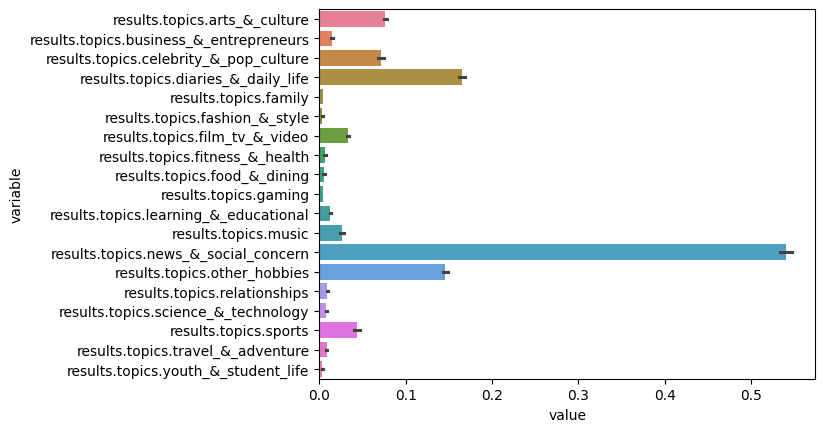

In [50]:
seaborn.barplot(
    classified_data.filter(like=".topics.").melt(),
    x="value", y="variable", hue="variable",
)

<Axes: xlabel='value', ylabel='variable'>

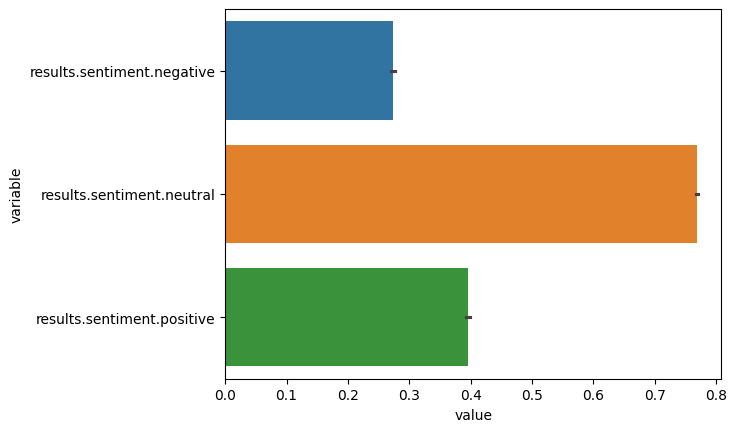

In [51]:
seaborn.barplot(
    classified_data.filter(like=".sentiment.").melt(),
    x="value", y="variable", hue="variable",
)

<Axes: xlabel='value', ylabel='variable'>

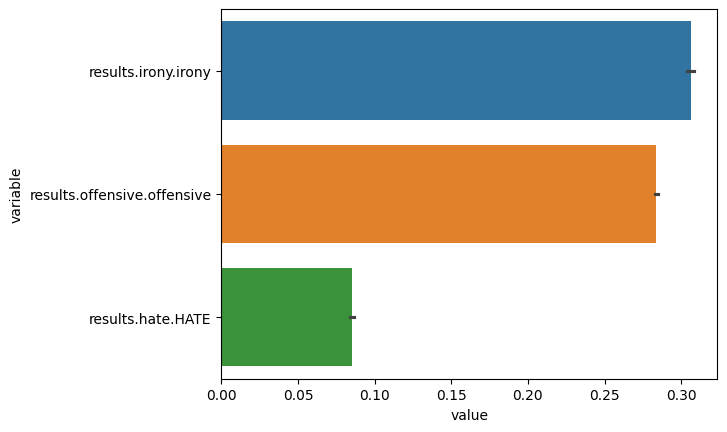

In [52]:
seaborn.barplot(
    classified_data.filter(regex="irony\.irony|offensive\.offensive|hate\.HATE").melt(),
    x="value", y="variable", hue="variable",
)